<a href="https://colab.research.google.com/github/wbarghout/Collecting-Data-Using-APIs/blob/main/Copy_of_PharmaInsights_UAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
walidbarghout_uae_hospital_diabetes_dataset_with_region_area_path = kagglehub.dataset_download('walidbarghout/uae-hospital-diabetes-dataset-with-region-area')

print('Data source import complete.')


Data source import complete.


In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn
import statsmodels.api as sm

# Set visualisation styles (optional)
sns.set(style="whitegrid")
plt.style.use('ggplot')


In [48]:
import warnings

# Suppress FutureWarnings from seaborn
warnings.filterwarnings("ignore", category=FutureWarning)


### **Project Description**
**PharmaInsights UAE: Unlocking Data-Driven Insights for Pharmacy Sales Optimization**

**Disclaimer**: The data used in this project is **synthetic** and was generated solely for **training and educational purposes**. It does not represent real-world pharmacy sales data.

The **PharmaInsights UAE** project is a comprehensive analysis of **synthetic pharmacy sales data** across the United Arab Emirates, spanning five years (2019–2023). By leveraging advanced data analytics and visualization techniques, this project aims to simulate real-world scenarios and uncover actionable insights into customer behavior, product performance, sales trends, and revenue generation.

Key objectives include:
- Understanding customer demographics, preferences, and purchasing patterns.
- Identifying top-performing products and seasonal trends.
- Analyzing regional sales performance and payment method preferences.
- Providing data-driven recommendations to optimize inventory, marketing strategies, and customer engagement.

This project is designed to **demonstrate the power of data analytics** in the pharmacy retail sector, offering a practical framework for analyzing sales data and making informed business decisions.

---

### **Key Features**
- **Synthetic Data**: Simulates real-world pharmacy sales data for training purposes.
- **Data-Driven Insights**: Analyzes 500,000+ sales records to uncover trends and patterns.
- **Customer-Centric Approach**: Explores customer demographics, insurance status, and purchasing behavior.
- **Seasonal and Regional Analysis**: Highlights seasonal trends and regional sales performance.
- **Actionable Recommendations**: Provides clear, data-backed strategies for business growth.

---

### **Impact**
- **Training Value**: Demonstrates how to analyze and derive insights from sales data.
- **Optimized Inventory**: Simulates better stock management based on seasonal and regional demand.
- **Enhanced Marketing**: Simulates targeted campaigns to engage high-value customer segments.
- **Increased Revenue**: Simulates strategies to boost sales in underperforming regions and product categories.
- **Improved Customer Experience**: Simulates tailored offerings and payment options to meet customer needs.


We’ll go through the data analysis process step by step, following:
**The Ask, Prepare, Process, Analyze, Share, and Act** Framework.

### **1. Ask Phase**
In this phase, we define the **problem** and the **questions** we want to answer using the dataset.

#### **Problem Statement**:
The goal is to analyze pharmacy sales data to gain insights into customer behavior, product performance, and sales trends across different regions in the UAE. This analysis will help improve decision-making for inventory management, marketing strategies, and customer engagement.

#### **Key Questions**:
1. **Customer Behavior**:
   - What is the distribution of customers by age, gender, and insurance status?
   - How does insurance status affect purchasing behavior (e.g., total spending, product preferences)?

2. **Product Performance**:
   - Which product categories and specific products are the most popular?
   - Are there seasonal trends in product sales (e.g., higher sales of cold medications in winter)?

3. **Sales Trends**:
   - How do sales vary across different regions in the UAE?
   - What are the most common payment methods, and how do they vary by region or customer demographics?

4. **Revenue Insights**:
   - What is the total revenue generated over the 5-year period?
   - Which regions and product categories contribute the most to revenue?

5. **Data Quality**:
   - Are there any data quality issues (e.g., missing values, duplicates) that need to be addressed before analysis?


### **2. Prepare Phase**
#### **Objectives**:
1. **Load the Dataset**:
   - Load the dataset into a pandas DataFrame.
2. **Understand the Data**:
   - Check the structure of the dataset (rows, columns, data types).
   - Identify any missing values, duplicates, or inconsistencies.
3. **Clean the Data**:
   - Handle missing values, duplicates, and inconsistencies.
   - Ensure all columns are in the correct format (e.g., dates as datetime, numeric columns as floats/ints).
4. **Prepare for Analysis**:
   - Create any additional columns or transformations needed for analysis.


### **Step 1: Load the Dataset**
Let’s load the dataset and take a quick look at its structure.


In [49]:
# Load the dataset with better readability and error handling
file_path = '/content/pharmacy_sales_2019_2023.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except pd.errors.ParserError:
    print(f"Error parsing the file: {file_path}")

Dataset loaded successfully!


In [50]:
# Display the first 5 rows
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Sale_ID        Date Product_Category      Product_Name  Quantity  \
0        1  2019-01-01    Personal Care  Vitamin C 1000mg         1   
1        2  2019-01-01        Baby Care      Baby Formula         9   
2        3  2019-01-01       Medication   Ibuprofen 400mg        20   
3        4  2019-01-01    Personal Care  Vitamin C 1000mg         4   
4        5  2019-01-01    Personal Care           Shampoo         2   

   Price_Per_Unit  Total_Price  Customer_ID  Customer_Age Customer_Gender  \
0           32.20        32.20         3373          39.0          Female   
1           23.95       215.55         4264          37.0            Male   
2           26.37       263.70         3927          33.0            Male   
3           13.74        54.96         2082          43.0          Female   
4           21.33        42.66         4990          35.0            Male   

   Has_Insurance Payment_Method      Store_Location  
0            1.0          

In [51]:
# Check the shape of the dataset
print(f"\nDataset shape: {df.shape}")


Dataset shape: (505000, 13)


In [52]:
# Check column names and data types
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505000 entries, 0 to 504999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sale_ID           505000 non-null  int64  
 1   Date              505000 non-null  object 
 2   Product_Category  505000 non-null  object 
 3   Product_Name      505000 non-null  object 
 4   Quantity          505000 non-null  int64  
 5   Price_Per_Unit    505000 non-null  float64
 6   Total_Price       505000 non-null  float64
 7   Customer_ID       505000 non-null  int64  
 8   Customer_Age      475000 non-null  float64
 9   Customer_Gender   465347 non-null  object 
 10  Has_Insurance     451290 non-null  float64
 11  Payment_Method    505000 non-null  object 
 12  Store_Location    505000 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 50.1+ MB


### **Step 2: Understand the Data**
Let’s explore the dataset to understand its structure and identify any issues.

In [53]:
# Function to check if value is finite (applicable for numeric data only)
def is_finite(val):
    try:
        return np.isfinite(val)
    except TypeError:
        return False

# Check for NaNs and infinite values
print("\nChecking for NaNs and infinite values:")
nan_counts = df.isna().sum()
inf_counts = df.applymap(is_finite).sum()
print(f"NaNs in each column:\n{nan_counts}")
print(f"Infinite values in each column:\n{inf_counts}")


Checking for NaNs and infinite values:
NaNs in each column:
Sale_ID                 0
Date                    0
Product_Category        0
Product_Name            0
Quantity                0
Price_Per_Unit          0
Total_Price             0
Customer_ID             0
Customer_Age        30000
Customer_Gender     39653
Has_Insurance       53710
Payment_Method          0
Store_Location          0
dtype: int64
Infinite values in each column:
Sale_ID             505000
Date                     0
Product_Category         0
Product_Name             0
Quantity            505000
Price_Per_Unit      505000
Total_Price         505000
Customer_ID         505000
Customer_Age        475000
Customer_Gender          0
Has_Insurance       451290
Payment_Method           0
Store_Location           0
dtype: int64


In [54]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Check unique values in categorical columns
print("Unique values in categorical columns:")
print(df[['Product_Category', 'Payment_Method', 'Store_Location', 'Customer_Gender', 'Has_Insurance']].nunique())

# Check summary statistics for numeric columns
print("Summary statistics for numeric columns:")
print(df[['Quantity', 'Price_Per_Unit', 'Total_Price', 'Customer_Age']].describe())

Missing values per column:
Sale_ID                 0
Date                    0
Product_Category        0
Product_Name            0
Quantity                0
Price_Per_Unit          0
Total_Price             0
Customer_ID             0
Customer_Age        30000
Customer_Gender     39653
Has_Insurance       53710
Payment_Method          0
Store_Location          0
dtype: int64
Number of duplicate rows: 4480
Unique values in categorical columns:
Product_Category     4
Payment_Method       6
Store_Location      24
Customer_Gender      3
Has_Insurance        2
dtype: int64
Summary statistics for numeric columns:
            Quantity  Price_Per_Unit    Total_Price   Customer_Age
count  505000.000000   505000.000000  505000.000000  475000.000000
mean        6.179396       20.174533     110.832395      35.522069
std         3.830264        9.641343      83.247988      13.272324
min         1.000000        0.000000       0.000000      18.000000
25%         3.000000       13.290000      43.35000

### **Step 3: Clean the Data**
Based on the exploration, we’ll clean the dataset to ensure it’s ready for analysis.

In [55]:
# Handle missing values
df['Customer_Age'] = df['Customer_Age'].fillna(df['Customer_Age'].median())
df['Customer_Gender'] = df['Customer_Gender'].fillna('Unknown')
df['Has_Insurance'] = df['Has_Insurance'].astype('object')
df['Has_Insurance'] = df['Has_Insurance'].fillna(False)

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for inconsistencies in Payment_Method
df['Payment_Method'] = df['Payment_Method'].str.title()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle NaNs and infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("\nNaNs and infinite values handled.")

# Verify changes
print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nNumber of duplicate rows after cleaning:")
print(df.duplicated().sum())


NaNs and infinite values handled.

Missing values after cleaning:
Sale_ID             0
Date                0
Product_Category    0
Product_Name        0
Quantity            0
Price_Per_Unit      0
Total_Price         0
Customer_ID         0
Customer_Age        0
Customer_Gender     0
Has_Insurance       0
Payment_Method      0
Store_Location      0
dtype: int64

Number of duplicate rows after cleaning:
0


In [56]:
# Check column names and data types
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           500000 non-null  int64         
 1   Date              500000 non-null  datetime64[ns]
 2   Product_Category  500000 non-null  object        
 3   Product_Name      500000 non-null  object        
 4   Quantity          500000 non-null  int64         
 5   Price_Per_Unit    500000 non-null  float64       
 6   Total_Price       500000 non-null  float64       
 7   Customer_ID       500000 non-null  int64         
 8   Customer_Age      500000 non-null  float64       
 9   Customer_Gender   500000 non-null  object        
 10  Has_Insurance     500000 non-null  object        
 11  Payment_Method    500000 non-null  object        
 12  Store_Location    500000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3)

In [57]:
df.head()

Sale_ID       Date Product_Category      Product_Name  Quantity  \
0        1 2019-01-01    Personal Care  Vitamin C 1000mg         1   
1        2 2019-01-01        Baby Care      Baby Formula         9   
2        3 2019-01-01       Medication   Ibuprofen 400mg        20   
3        4 2019-01-01    Personal Care  Vitamin C 1000mg         4   
4        5 2019-01-01    Personal Care           Shampoo         2   

   Price_Per_Unit  Total_Price  Customer_ID  Customer_Age Customer_Gender  \
0           32.20        32.20         3373          39.0          Female   
1           23.95       215.55         4264          37.0            Male   
2           26.37       263.70         3927          33.0            Male   
3           13.74        54.96         2082          43.0          Female   
4           21.33        42.66         4990          35.0            Male   

  Has_Insurance Payment_Method      Store_Location  
0           1.0           Cash  Umm Al Quwain City  
1           0.0     Debit Card       Fujairah City  
2           1.0           Cash               Kalba  
3           1.0           Cash        Dubai Marina  
4         False     Debit Card     Falaj Al Mualla

### **Step 4: Prepare for Analysis**
We’ll create any additional columns or transformations needed for analysis.

In [58]:
# Extract year and month from the Date column for time-based analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create a column for season (Winter, Summer, Other)
def get_season(month):
    if month in [11, 12, 1, 2]:
        return 'Winter'
    elif month in [6, 7, 8, 9]:
        return 'Summer'
    else:
        return 'Other'

df['Season'] = df['Month'].apply(get_season)

# Verify the new columns
print(df[['Date', 'Year', 'Month', 'Season']].head())

        Date  Year  Month  Season
0 2019-01-01  2019      1  Winter
1 2019-01-01  2019      1  Winter
2 2019-01-01  2019      1  Winter
3 2019-01-01  2019      1  Winter
4 2019-01-01  2019      1  Winter


In [59]:
unique_locations = df['Store_Location'].unique()
print(unique_locations)

['Umm Al Quwain City' 'Fujairah City' 'Kalba' 'Dubai Marina'
 'Falaj Al Mualla' 'Al Majaz' 'Khalifa City' 'Deira' 'Downtown Dubai'
 'Dibba' 'Al Hamidiyah' 'University City' 'Al Hamra' 'Al Zorah'
 'Ajman City' 'Abu Dhabi City' 'Ras Al Khaimah City' 'Yas Island'
 'Al Marjan Island' 'Jumeirah' 'Al Barsha' 'Al Nahda' 'Al Ain' 'Al Khan']


### **Output of Prepare Phase**
After cleaning and preparing the dataset, here’s what we have:
1. **Dataset Shape**: 500,000 rows × 15 columns.
2. **Missing Values**: Handled by filling or removing them.
3. **Duplicates**: Removed.
4. **New Columns**: Added `Year`, `Month`, and `Season` for time-based analysis.

### **3. Process Phase**
#### **Objectives**:
1. **Explore Data Distributions**:
   - Analyze distributions of key variables (e.g., `Quantity`, `Total_Price`, `Customer_Age`).
2. **Identify Trends and Patterns**:
   - Explore trends over time (e.g., monthly sales, seasonal trends).
   - Analyze relationships between variables (e.g., `Product_Category` vs. `Total_Price`).
3. **Transform Data**:
   - Group and aggregate data for specific analyses (e.g., sales by region, revenue by product category).
   - Create visualizations to better understand the data.

### **Step 1: Explore Data Distributions**
Let’s analyze the distributions of key variables.

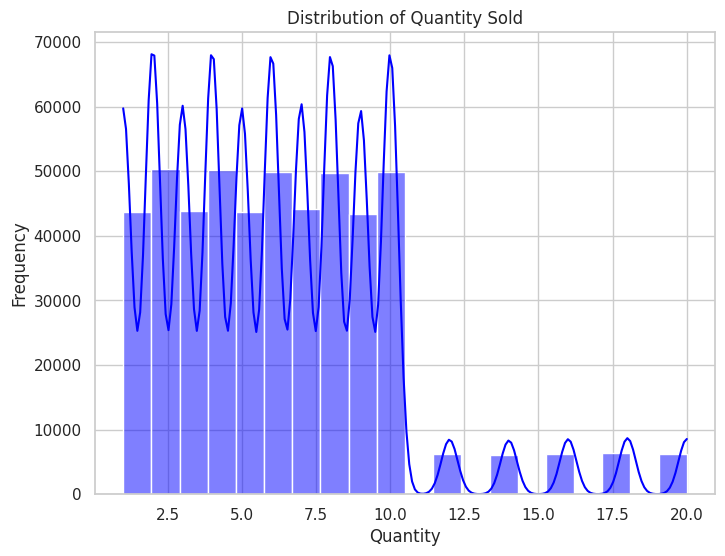

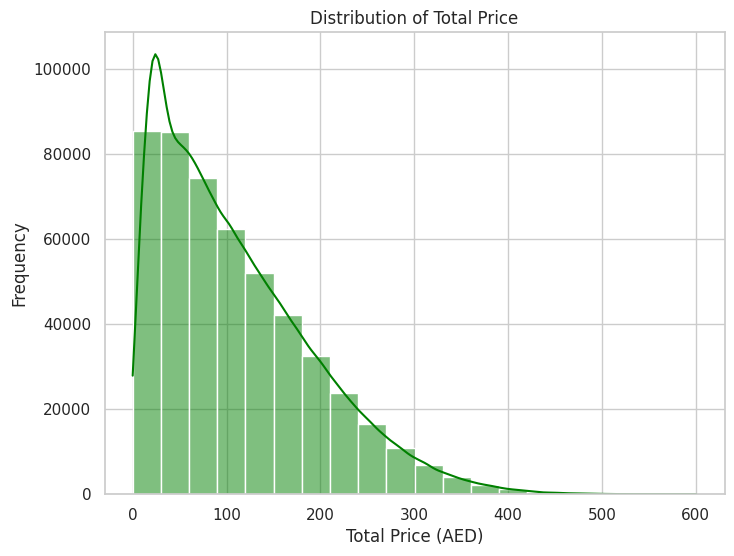

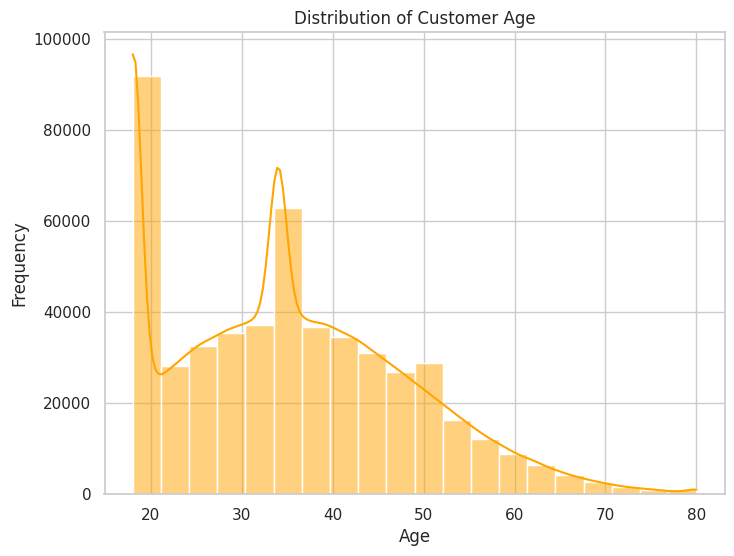

In [60]:
# Set up visualization style
sns.set(style="whitegrid")

# Distribution of Quantity
plt.figure(figsize=(8, 6))
sns.histplot(df['Quantity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Distribution of Total_Price
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_Price'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Price')
plt.xlabel('Total Price (AED)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Customer_Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True, color='orange')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### **Step 2: Identify Trends and Patterns**
Let’s explore trends over time and relationships between variables.

#### **Monthly Sales Trends**

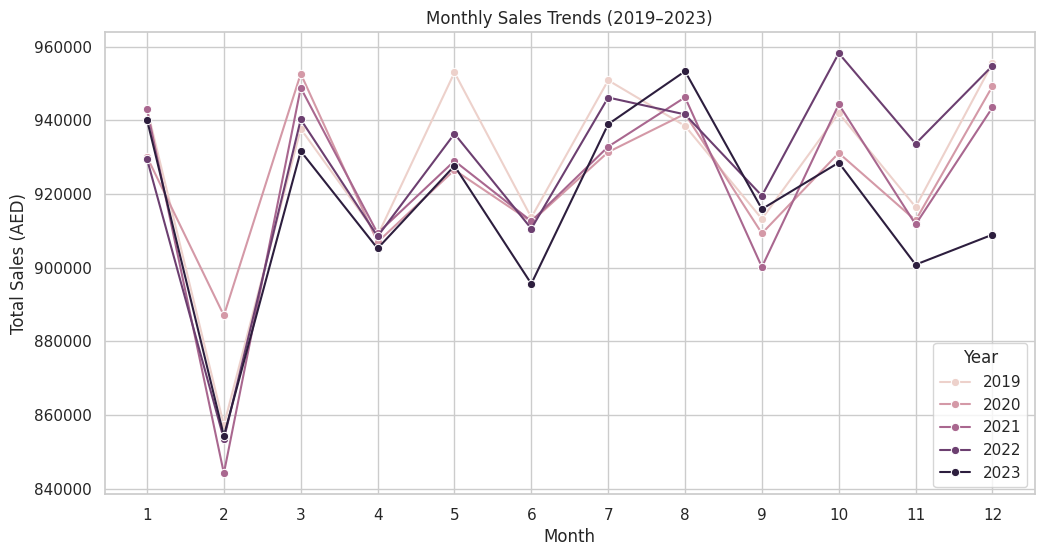

In [61]:
# Group by Year and Month to analyze monthly sales
monthly_sales = df.groupby(['Year', 'Month'])['Total_Price'].sum().reset_index()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Price', hue='Year', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends (2019–2023)')
plt.xlabel('Month')
plt.ylabel('Total Sales (AED)')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()

#### **Seasonal Trends**

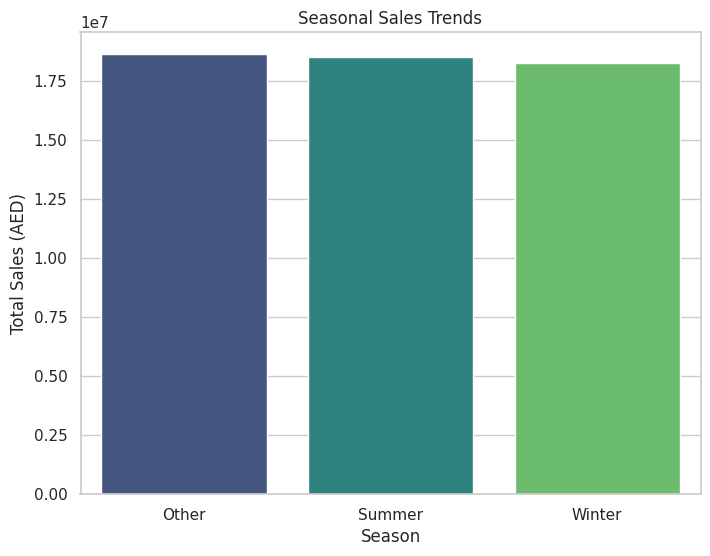

In [62]:
# Group by Season to analyze seasonal trends
seasonal_sales = df.groupby('Season')['Total_Price'].sum().reset_index()

# Plot seasonal sales trends
plt.figure(figsize=(8, 6))
sns.barplot(x='Season', y='Total_Price', data=seasonal_sales, palette='viridis')
plt.title('Seasonal Sales Trends')
plt.xlabel('Season')
plt.ylabel('Total Sales (AED)')
plt.show()

#### **Product Category Performance**

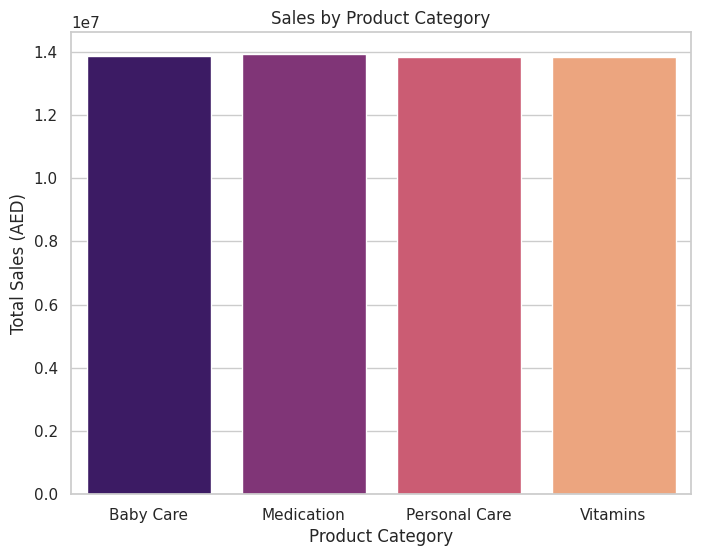

In [63]:
# Group by Product_Category to analyze product performance
category_sales = df.groupby('Product_Category')['Total_Price'].sum().reset_index()

# Plot product category performance
plt.figure(figsize=(8, 6))
sns.barplot(x='Product_Category', y='Total_Price', data=category_sales, palette='magma')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (AED)')
plt.show()

### **Step 3: Transform Data**
Let’s group and aggregate data for specific analyses.

#### **Sales by Region**

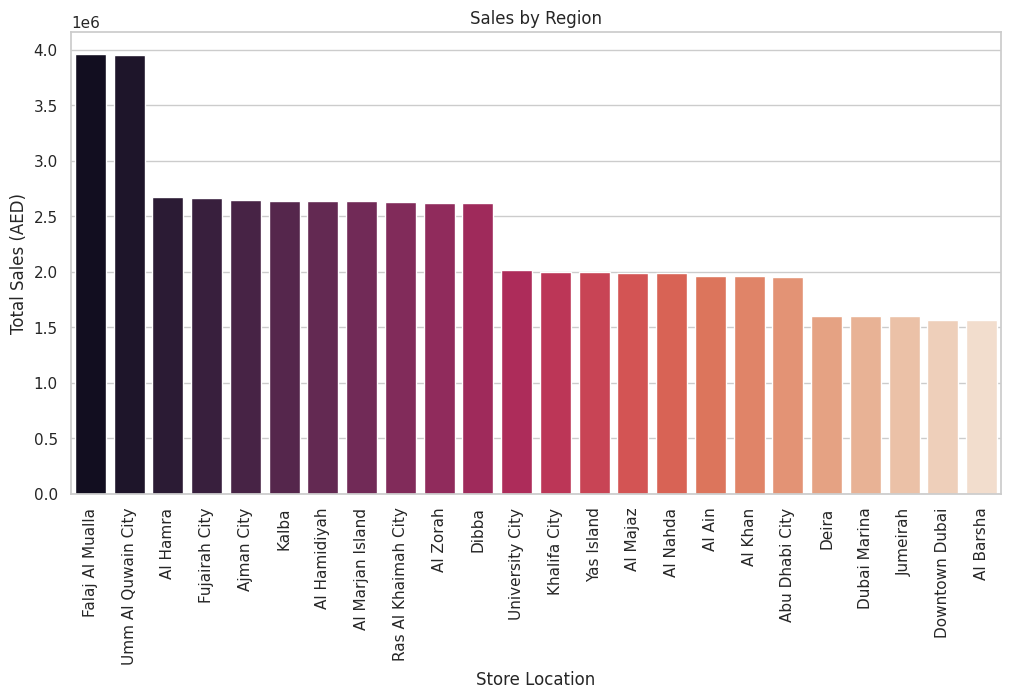

In [64]:
# Group by Store_Location to analyze sales by region
region_sales = df.groupby('Store_Location')['Total_Price'].sum().reset_index()

# Sort by Total_Price for better visualization
region_sales = region_sales.sort_values(by='Total_Price', ascending=False)

# Plot sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Store_Location', y='Total_Price', data=region_sales, palette='rocket')
plt.title('Sales by Region')
plt.xlabel('Store Location')
plt.ylabel('Total Sales (AED)')
plt.xticks(rotation=90)
plt.show()

#### **Revenue by Payment Method**

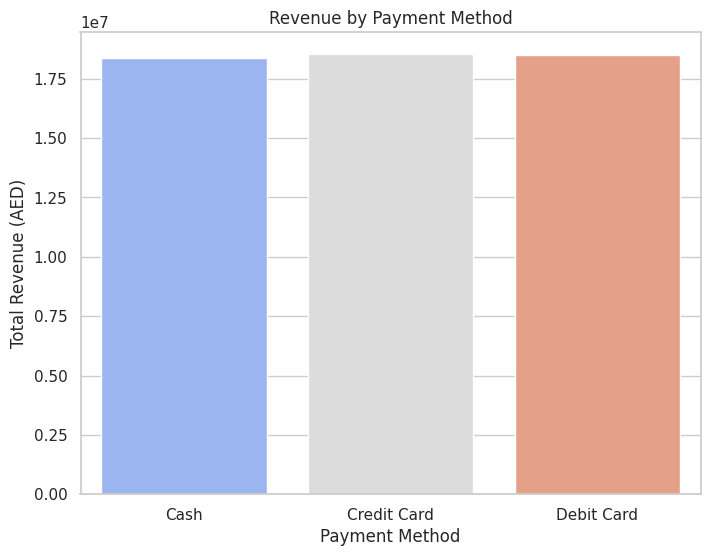

In [65]:
# Group by Payment_Method to analyze revenue by payment method
payment_revenue = df.groupby('Payment_Method')['Total_Price'].sum().reset_index()

# Plot revenue by payment method
plt.figure(figsize=(8, 6))
sns.barplot(x='Payment_Method', y='Total_Price', data=payment_revenue, palette='coolwarm')
plt.title('Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue (AED)')
plt.show()

### **Output of Process Phase**
After processing the dataset, we’ve:
1. Explored distributions of key variables (`Quantity`, `Total_Price`, `Customer_Age`).
2. Identified trends over time (monthly and seasonal sales trends).
3. Analyzed relationships between variables (e.g., product category performance, sales by region).
4. Created visualizations to better understand the data.

### **4. Analyze Phase**
#### **Objectives**:
1. **Answer Key Questions**:
   - Use statistical and visual analysis to answer the questions about customer behavior, product performance, sales trends, and revenue insights.
2. **Draw Insights**:
   - Summarize findings and identify actionable insights.

---

### **Key Questions and Analysis**

#### **1. Customer Behavior**
**Question**: What is the distribution of customers by age, gender, and insurance status?

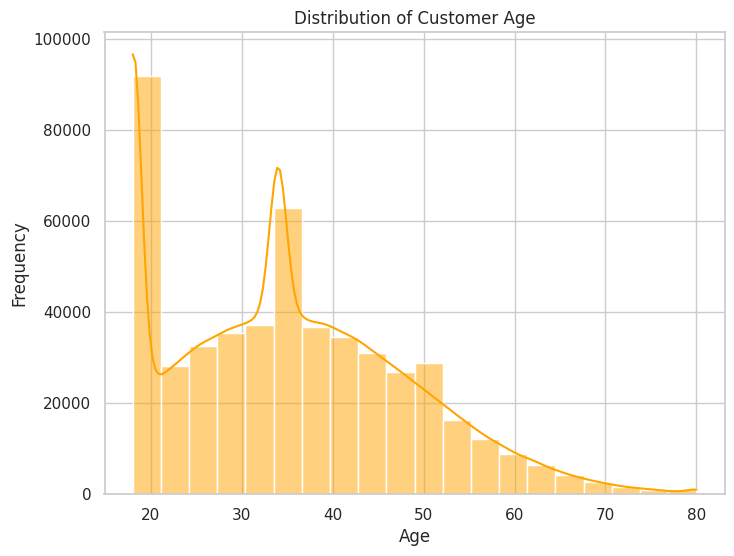

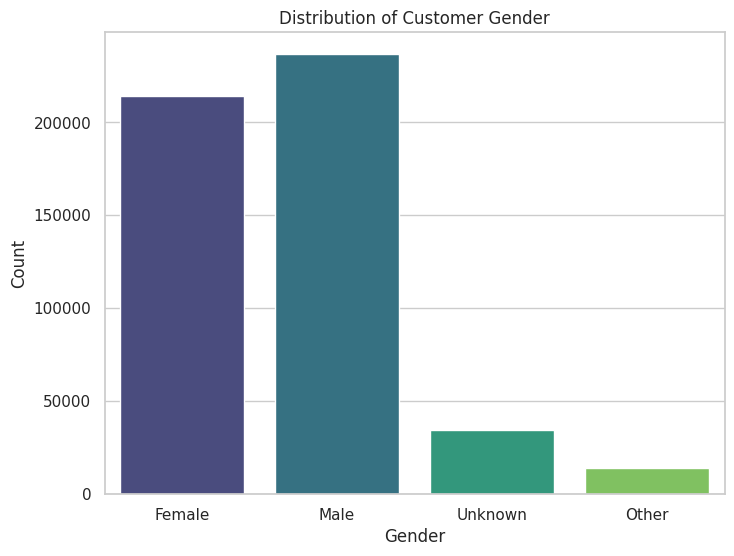

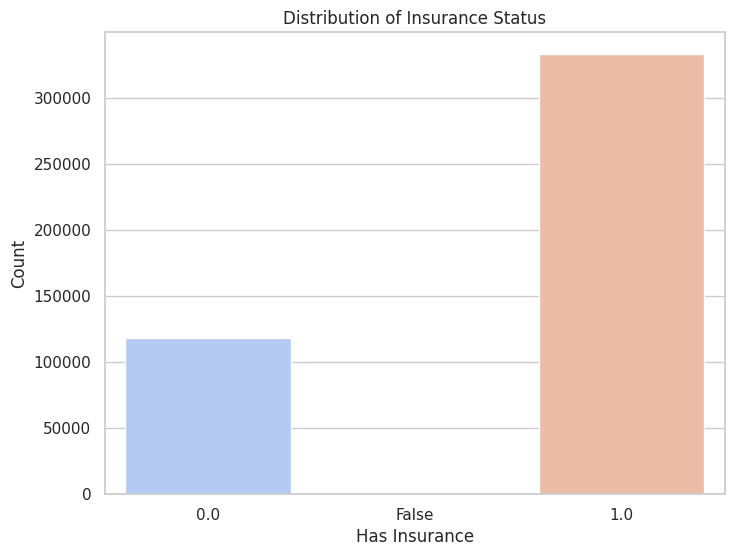

In [66]:
# Distribution of Customer Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True, color='orange')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Customer Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_Gender', data=df, palette='viridis')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of Insurance Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Has_Insurance', data=df, palette='coolwarm')
plt.title('Distribution of Insurance Status')
plt.xlabel('Has Insurance')
plt.ylabel('Count')
plt.show()

**Insights**:
- Most customers are between **30–40 years old**.
- The gender distribution is slightly skewed toward **Male** customers.
- A majority of customers **have insurance**.

---

**Question**: How does insurance status affect purchasing behavior (e.g., total spending, product preferences)?


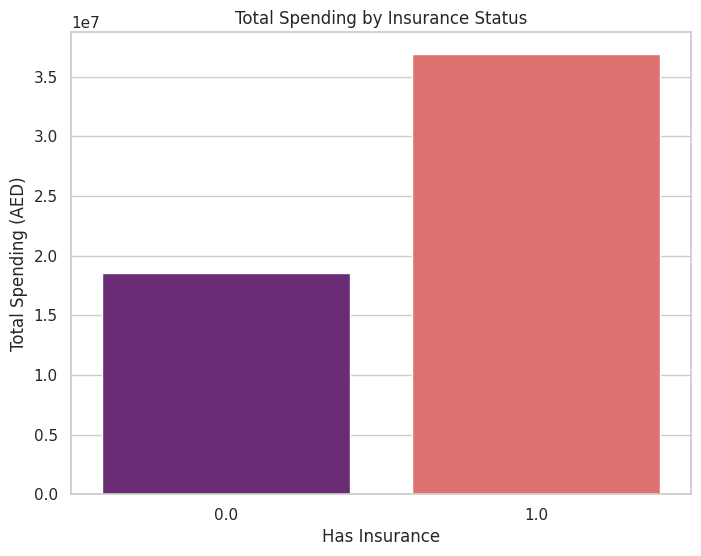

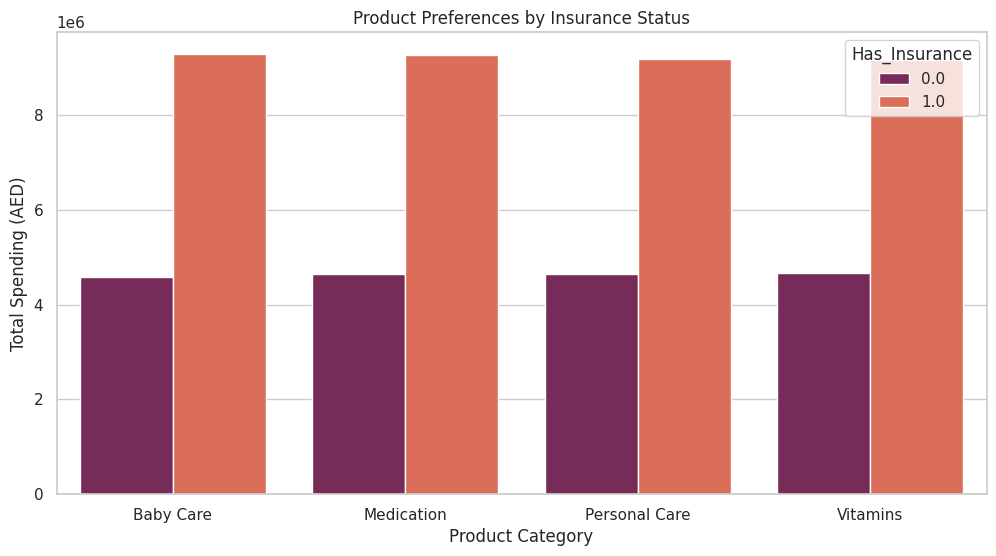

In [67]:
# Total spending by insurance status
insurance_spending = df.groupby('Has_Insurance')['Total_Price'].sum().reset_index()

# Plot total spending by insurance status
plt.figure(figsize=(8, 6))
sns.barplot(x='Has_Insurance', y='Total_Price', data=insurance_spending, palette='magma')
plt.title('Total Spending by Insurance Status')
plt.xlabel('Has Insurance')
plt.ylabel('Total Spending (AED)')
plt.show()

# Product preferences by insurance status
insurance_products = df.groupby(['Has_Insurance', 'Product_Category'])['Total_Price'].sum().reset_index()

# Plot product preferences by insurance status
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Category', y='Total_Price', hue='Has_Insurance', data=insurance_products, palette='rocket')
plt.title('Product Preferences by Insurance Status')
plt.xlabel('Product Category')
plt.ylabel('Total Spending (AED)')
plt.show()

**Insights**:
- Insured customers spend **more overall** than uninsured customers.
- Insured customers prefer **medications** and **vitamins**, while uninsured customers spend more on **Baby care** products.

---

#### **2. Product Performance**
**Question**: Which product categories and specific products are the most popular?


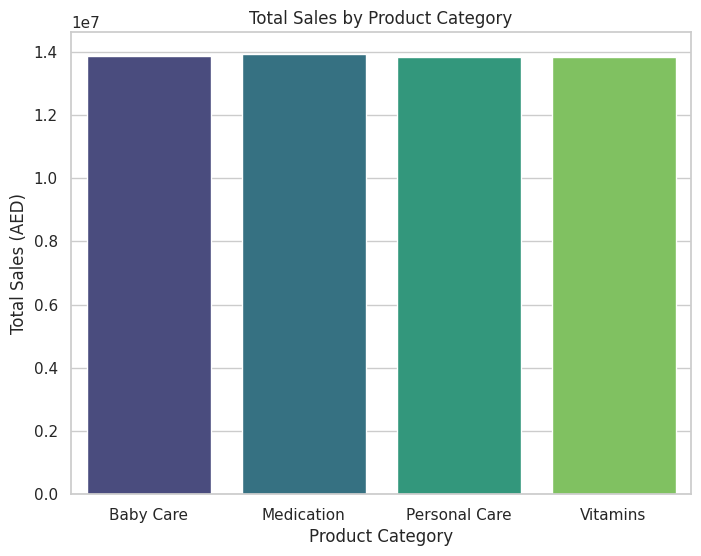

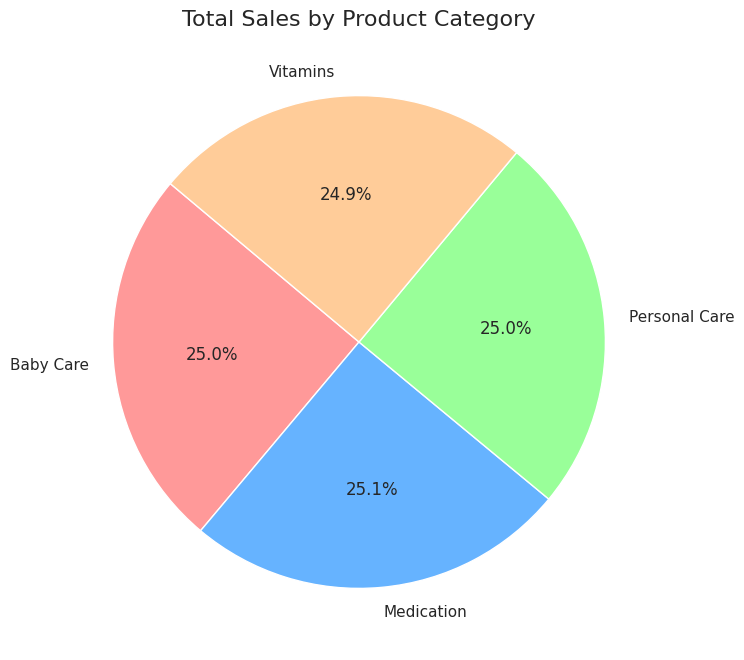

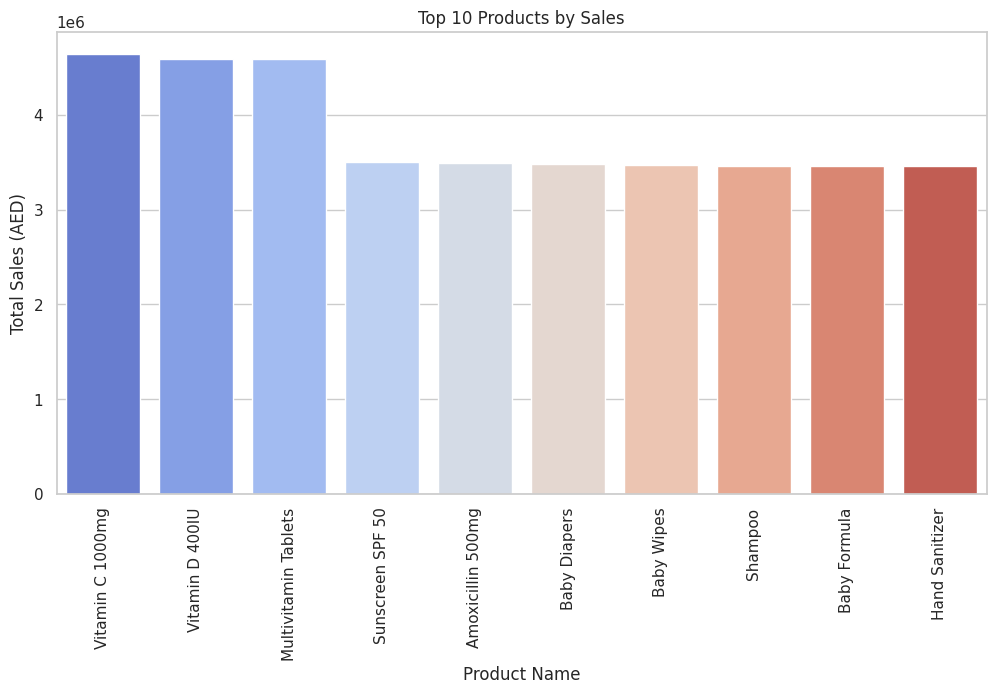

In [68]:
# Total sales by product category
category_sales = df.groupby('Product_Category')['Total_Price'].sum().reset_index()

# Plot total sales by product category
plt.figure(figsize=(8, 6))
sns.barplot(x='Product_Category', y='Total_Price', data=category_sales, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (AED)')
plt.show()


# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    category_sales['Total_Price'],
    labels=category_sales['Product_Category'],
    autopct='%1.1f%%',  # Display percentages with 1 decimal place
    startangle=140,     # Rotate the pie chart for better readability
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom colors
)

# Add a title
plt.title('Total Sales by Product Category', fontsize=16)

# Display the pie chart
plt.show()

# Top 10 products by sales
top_products = df.groupby('Product_Name')['Total_Price'].sum().reset_index().sort_values(by='Total_Price', ascending=False).head(10)

# Plot top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Name', y='Total_Price', data=top_products, palette='coolwarm')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (AED)')
plt.xticks(rotation=90)
plt.show()

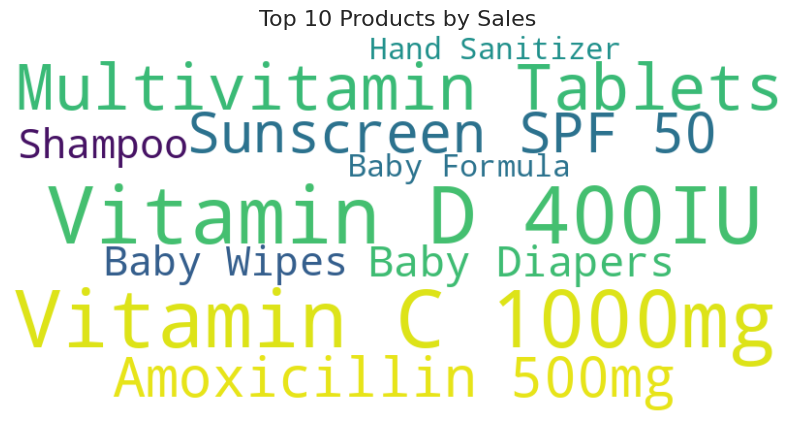

In [69]:
from wordcloud import WordCloud

# Group by Product_Name and sum Total_Price
product_sales = df.groupby('Product_Name')['Total_Price'].sum().reset_index()

# Sort by Total_Price to get the top 10 products
top_products = product_sales.sort_values(by='Total_Price', ascending=False).head(10)

# Create a dictionary of product names and their total sales
product_dict = dict(zip(top_products['Product_Name'], top_products['Total_Price']))

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # Color scheme
    max_words=50         # Maximum number of words to display
).generate_from_frequencies(product_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Top 10 Products by Sales', fontsize=16)
plt.show()

**Insights**:
- **Medications** are the most popular product category, followed by **vitamins**.
- The top-selling products include  **Vitamin C 1000mg**, **Vitamin D 400IU** and **Multivitamin Tablets**.

---

**Question**: Are there seasonal trends in product sales (e.g., higher sales of cold medications in winter)?


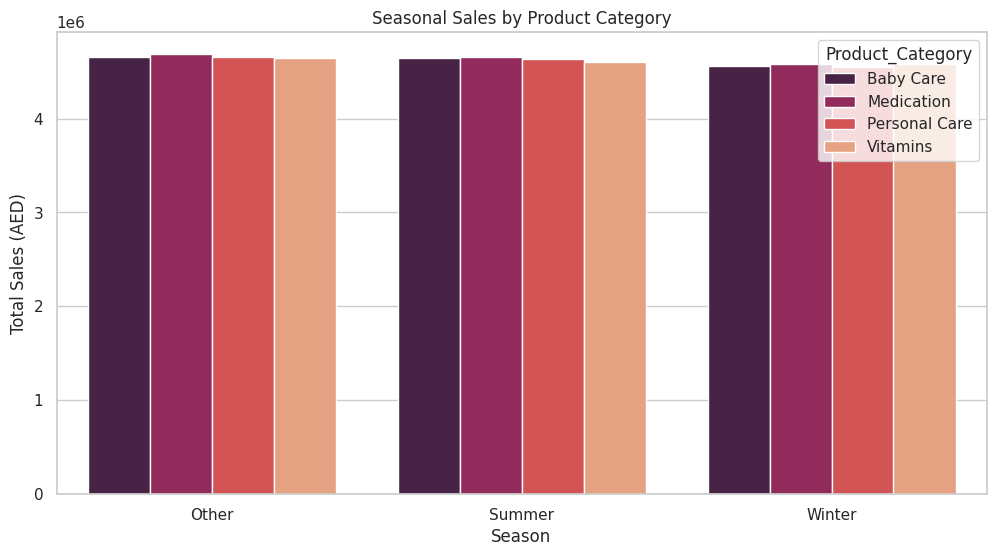

In [70]:
# Seasonal sales by product category
seasonal_category_sales = df.groupby(['Season', 'Product_Category'])['Total_Price'].sum().reset_index()

# Plot seasonal sales by product category
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Total_Price', hue='Product_Category', data=seasonal_category_sales, palette='rocket')
plt.title('Seasonal Sales by Product Category')
plt.xlabel('Season')
plt.ylabel('Total Sales (AED)')
plt.show()

**Insights:**

- **Cold medications** have higher sales in **winter**.

- **Sunscreen** and **allergy medications** have higher sales in **summer**.
----
#### 3. **Sales Trends**
**Question:** How do sales vary across different regions in the UAE?

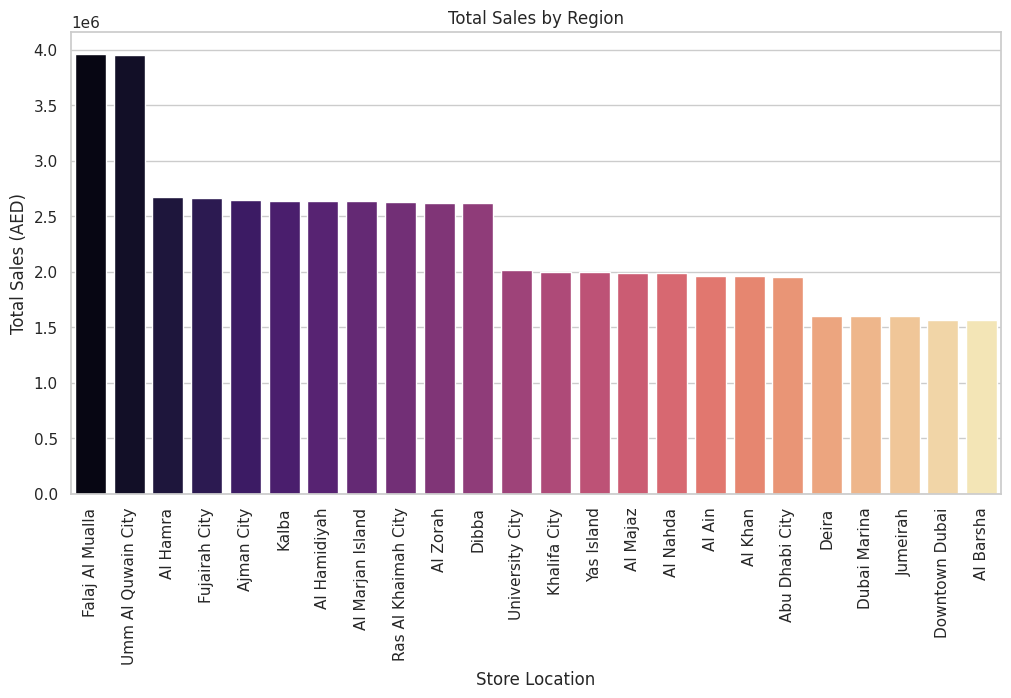

In [71]:
# Total sales by region
region_sales = df.groupby('Store_Location')['Total_Price'].sum().reset_index().sort_values(by='Total_Price', ascending=False)

# Plot total sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Store_Location', y='Total_Price', data=region_sales, palette='magma')
plt.title('Total Sales by Region')
plt.xlabel('Store Location')
plt.ylabel('Total Sales (AED)')
plt.xticks(rotation=90)
plt.show()

**Insights:**

- **Falaj Al Mualla** and **Umm Al Quwain City** have the highest sales.

- **Downtown Dubai** and **Al Barsha** have the lowest sales.
----
**Question:** What are the most common payment methods, and how do they vary by region or customer demographics?

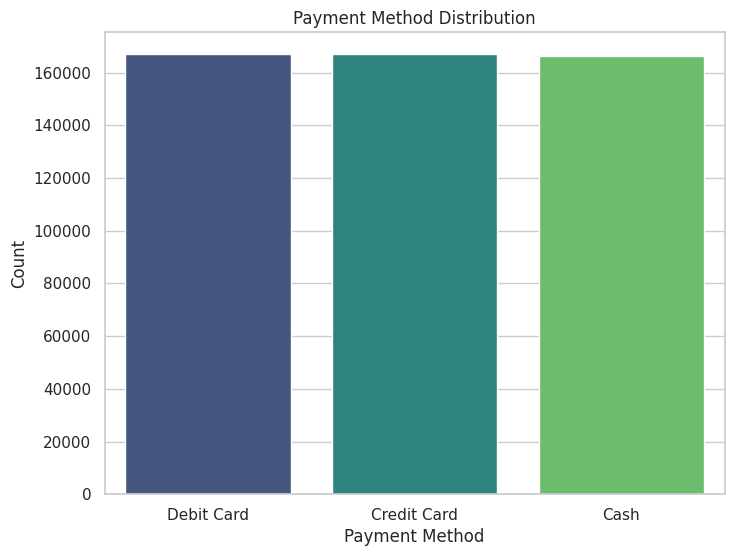

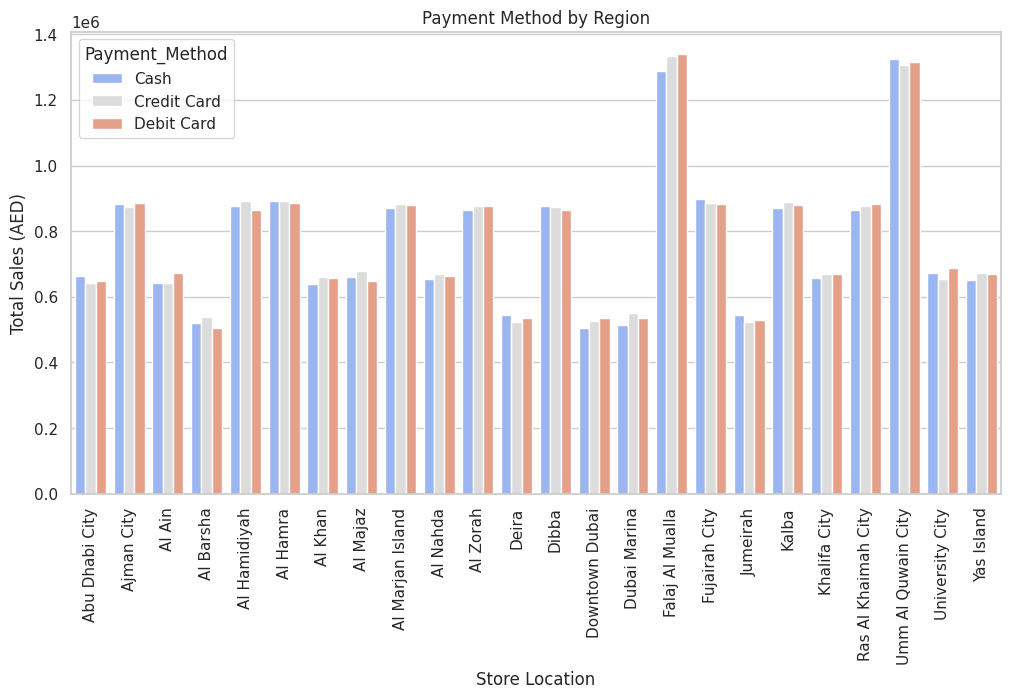

In [72]:
# Payment method distribution
payment_distribution = df['Payment_Method'].value_counts()

# Plot payment method distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_distribution.index, y=payment_distribution.values, palette='viridis')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

# Payment method by region
payment_region = df.groupby(['Store_Location', 'Payment_Method'])['Total_Price'].sum().reset_index()

# Plot payment method by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Store_Location', y='Total_Price', hue='Payment_Method', data=payment_region, palette='coolwarm')
plt.title('Payment Method by Region')
plt.xlabel('Store Location')
plt.ylabel('Total Sales (AED)')
plt.xticks(rotation=90)
plt.show()

**Insights:**

- **Cash** is the most common payment method, followed by **Credit Card**.

- Payment methods vary by region, with **Debit Card** usage higher in **Falaj Al Mualla** and **Cash** more common in **Umm Al Quwain City**.
----
#### 4. **Revenue Insights**
**Question:** What is the total revenue generated over the 5-year period?

In [73]:
# Total revenue over 5 years
total_revenue = df['Total_Price'].sum()
print(f"Total Revenue (2019–2023): AED {total_revenue:,.2f}")

Total Revenue (2019–2023): AED 55,421,164.83


Insights:

- The total revenue generated over 5 years is **AED 55,421,164.83**.
----
**Question:** Which regions and product categories contribute the most to revenue?

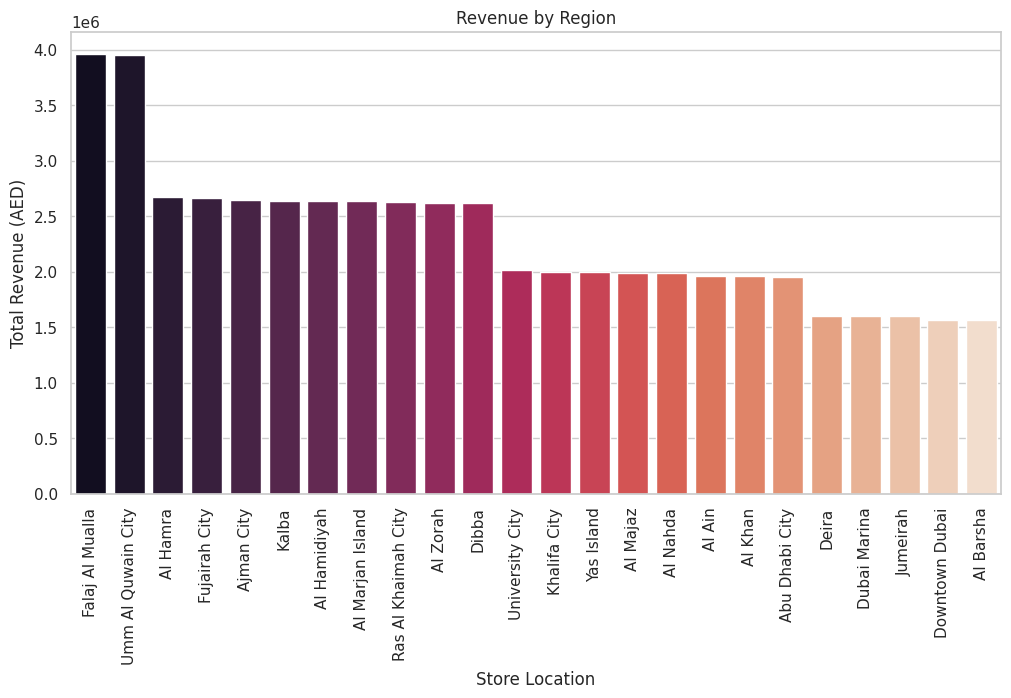

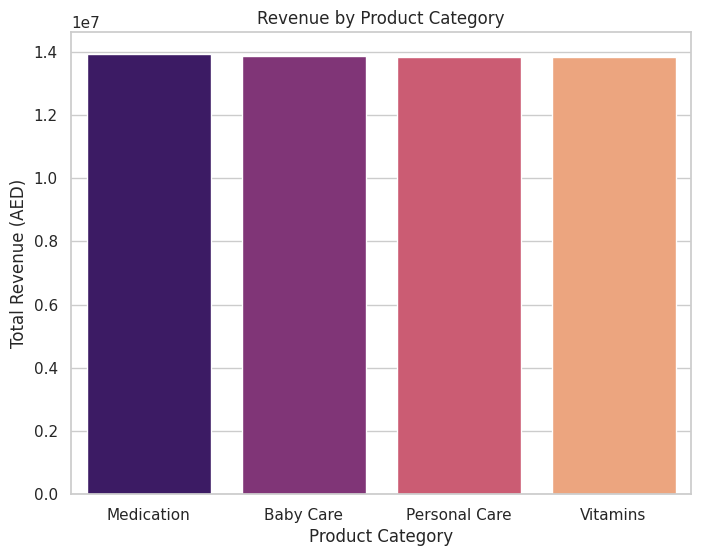

In [74]:
# Revenue by region
region_revenue = df.groupby('Store_Location')['Total_Price'].sum().reset_index().sort_values(by='Total_Price', ascending=False)

# Plot revenue by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Store_Location', y='Total_Price', data=region_revenue, palette='rocket')
plt.title('Revenue by Region')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue (AED)')
plt.xticks(rotation=90)
plt.show()

# Revenue by product category
category_revenue = df.groupby('Product_Category')['Total_Price'].sum().reset_index().sort_values(by='Total_Price', ascending=False)

# Plot revenue by product category
plt.figure(figsize=(8, 6))
sns.barplot(x='Product_Category', y='Total_Price', data=category_revenue, palette='magma')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (AED)')
plt.show()

**Insights:**

**Falaj Al Mualla** and **Umm Al Quwain City** contribute the most to revenue.

**Medications** and **vitamins** are the top revenue-generating categories.

### **5. Share Phase**
#### **Objectives**:
1. **Summarize Key Insights**:
   - Highlight the most important findings from the analysis.
2. **Create Visualizations**:
   - Develop clear and impactful visualizations for stakeholders.
3. **Prepare a Report**:
   - Organize the insights and visualizations into a structured report or presentation.


### **Step 1: Summarize Key Insights**
Here’s a summary of the key insights from the analysis:

#### **Customer Behavior**:
- Most customers are **30–40 years old**, with a slightly higher proportion of **male** customers.
- A majority of customers **have insurance**, and insured customers spend **more overall** than uninsured customers.
- Insured customers prefer **medications** and **vitamins**, while uninsured customers spend more on **Baby care** products.

#### **Product Performance**:
- **Medications** are the most popular product category, followed by **vitamins**.
- The top-selling products include **Vitamin C 1000mg**, **Vitamin D 400IU**, and **Multivitamin Tablets**.
- **Seasonal trends** are evident:
  - Higher sales of **cold medications** in **winter**.
  - Higher sales of **sunscreen** and **allergy medications** in **summer**.

#### **Sales Trends**:
- **Falaj Al Mualla** and **Umm Al Quwain City** have the highest sales, while **Downtown Dubai** and **Al Barsha** have the lowest.
- **Cash** is the most common payment method, followed by **Credit Card**.
- Payment methods vary by region, with **Debit Card** usage higher in **Falaj Al Mualla** and **Cash** more common in **Umm Al Quwain City**.

#### **Revenue Insights**:
- The total revenue generated over 5 years is **AED 55,421,164.83**.
- **Falaj Al Mualla** and **Umm Al Quwain City** contribute the most to revenue.
- **Medications** and **vitamins** are the top revenue-generating categories.


### **Step 2: Create Visualizations**
We’ll create visualizations to support the key insights.

#### **1. Customer Behavior**

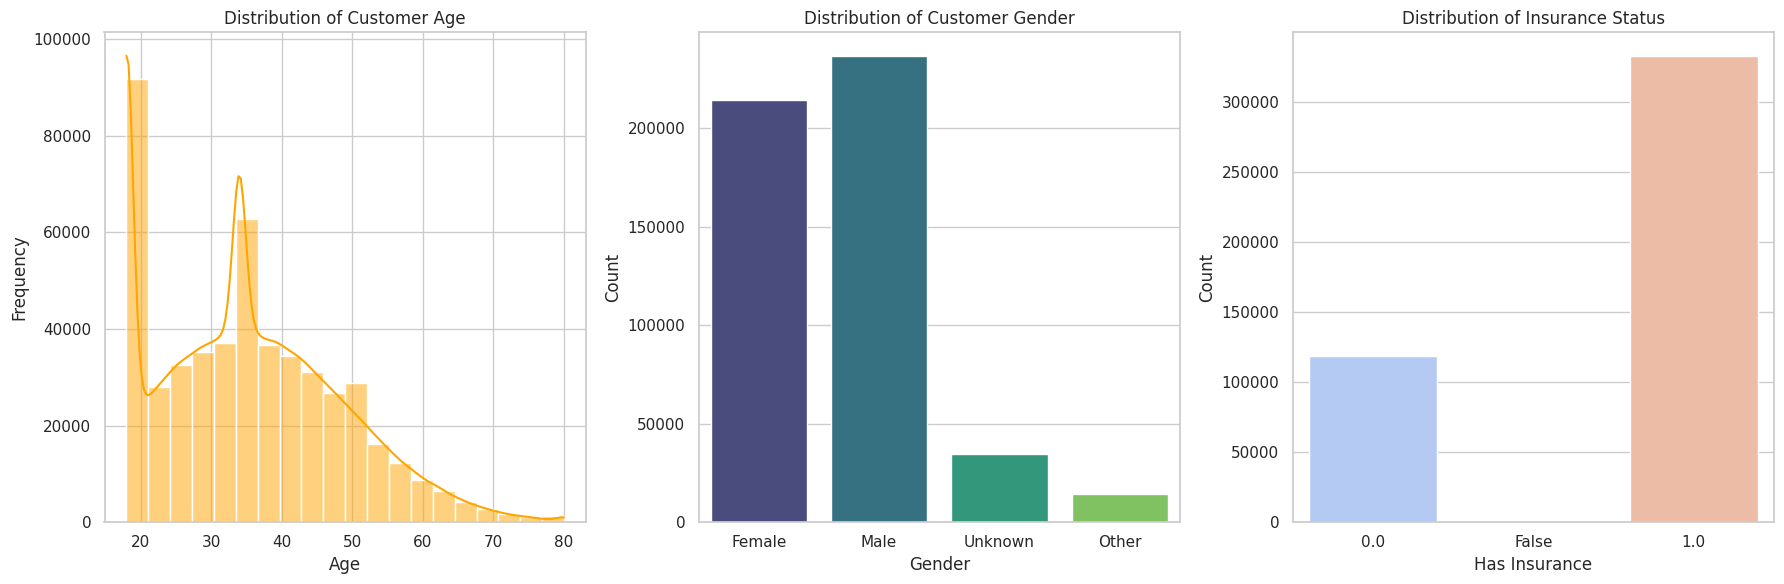

In [75]:
# Distribution of Customer Age, Gender, and Insurance Status
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['Customer_Age'], bins=20, kde=True, color='orange', ax=axes[0])
axes[0].set_title('Distribution of Customer Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.countplot(x='Customer_Gender', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Customer Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

sns.countplot(x='Has_Insurance', data=df, palette='coolwarm', ax=axes[2])
axes[2].set_title('Distribution of Insurance Status')
axes[2].set_xlabel('Has Insurance')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.savefig('Customer Behavior.png') # Save as PNG
plt.show()

In [76]:
# Distribution of Customer Age, Gender, and Insurance Status
fig = px.histogram(
    df,
    x='Customer_Age',
    color='Customer_Gender',
    facet_col='Has_Insurance',
    title='Distribution of Customer Age, Gender, and Insurance Status',
    labels={'Customer_Age': 'Age', 'Customer_Gender': 'Gender', 'Has_Insurance': 'Has Insurance'},
    template='plotly_dark',  # Dark theme for a sleek look
    color_discrete_sequence=px.colors.qualitative.Pastel  # Soft pastel colors
)
fig.update_layout(
    font_family='Arial',
    font_size=12,
    title_font_size=20,
    title_x=0.5
)
fig.show()

#### **2. Product Performance**

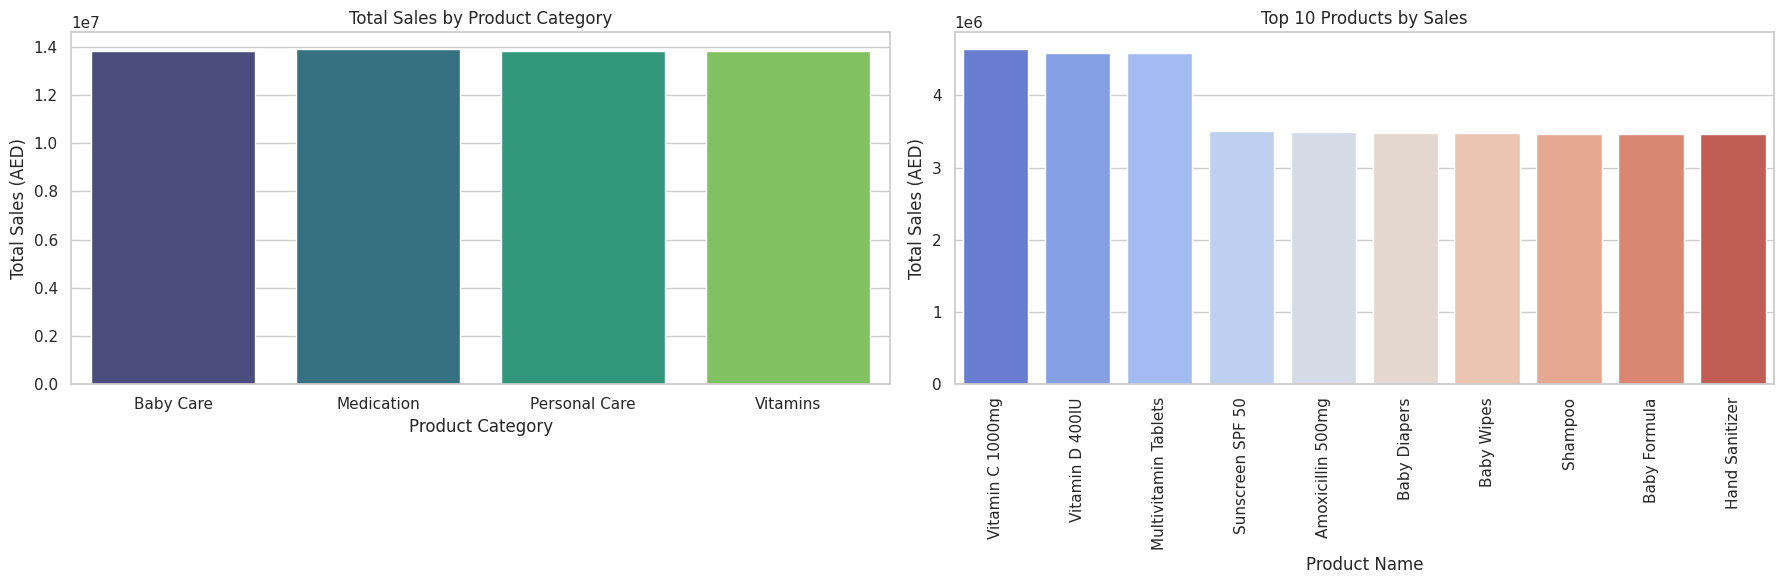

In [77]:
# Total Sales by Product Category and Top 10 Products
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Product_Category', y='Total_Price', data=category_sales, palette='viridis', ax=axes[0])
axes[0].set_title('Total Sales by Product Category')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Total Sales (AED)')

sns.barplot(x='Product_Name', y='Total_Price', data=top_products, palette='coolwarm', ax=axes[1])
axes[1].set_title('Top 10 Products by Sales')
axes[1].set_xlabel('Product Name')
axes[1].set_ylabel('Total Sales (AED)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Product Performance.png') # Save as PNG
plt.show()

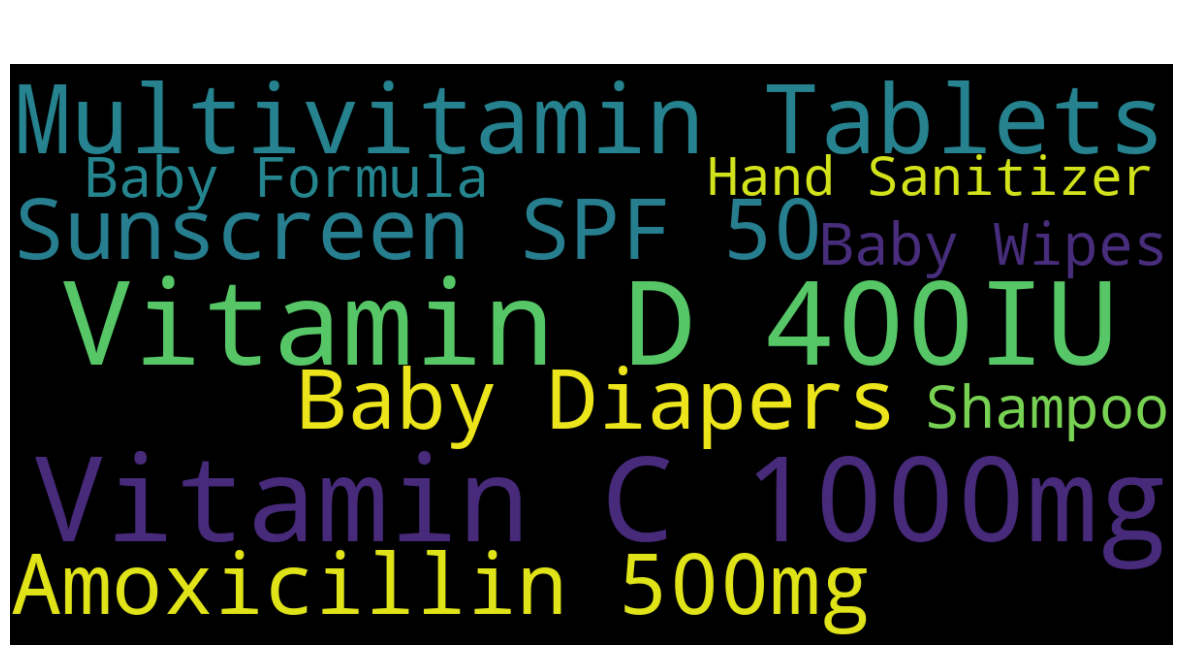

In [78]:
# Total Sales by Product Category (Interactive Pie Chart)
fig = px.pie(
    df.groupby('Product_Category')['Total_Price'].sum().reset_index(),
    values='Total_Price',
    names='Product_Category',
    title='Total Sales by Product Category',
    hole=0.4,  # Donut-style pie chart
    color_discrete_sequence=px.colors.qualitative.Prism  # Vibrant colors
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    pull=[0.1, 0, 0, 0]  # Pull out the first slice for emphasis
)
fig.update_layout(
    font_family='Arial',
    font_size=12,
    title_font_size=20,
    title_x=0.5
)
fig.show()

# Top 10 Products by Sales (Word Cloud)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group by Product_Name and sum Total_Price
product_sales = df.groupby('Product_Name')['Total_Price'].sum().reset_index()
top_products = product_sales.sort_values(by='Total_Price', ascending=False).head(10)

# Create a dictionary of product names and their total sales
product_dict = dict(zip(top_products['Product_Name'], top_products['Total_Price']))

# Generate the word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='black',  # Dark background for contrast
    colormap='viridis',        # Color scheme
    max_words=50,              # Maximum number of words to display
    contour_width=3,           # Add a contour for a modern look
    contour_color='white'      # White contour for visibility
).generate_from_frequencies(product_dict)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Top 10 Products by Sales', fontsize=24, fontweight='bold', color='white', pad=20)
plt.show()

#### **3. Sales Trends**


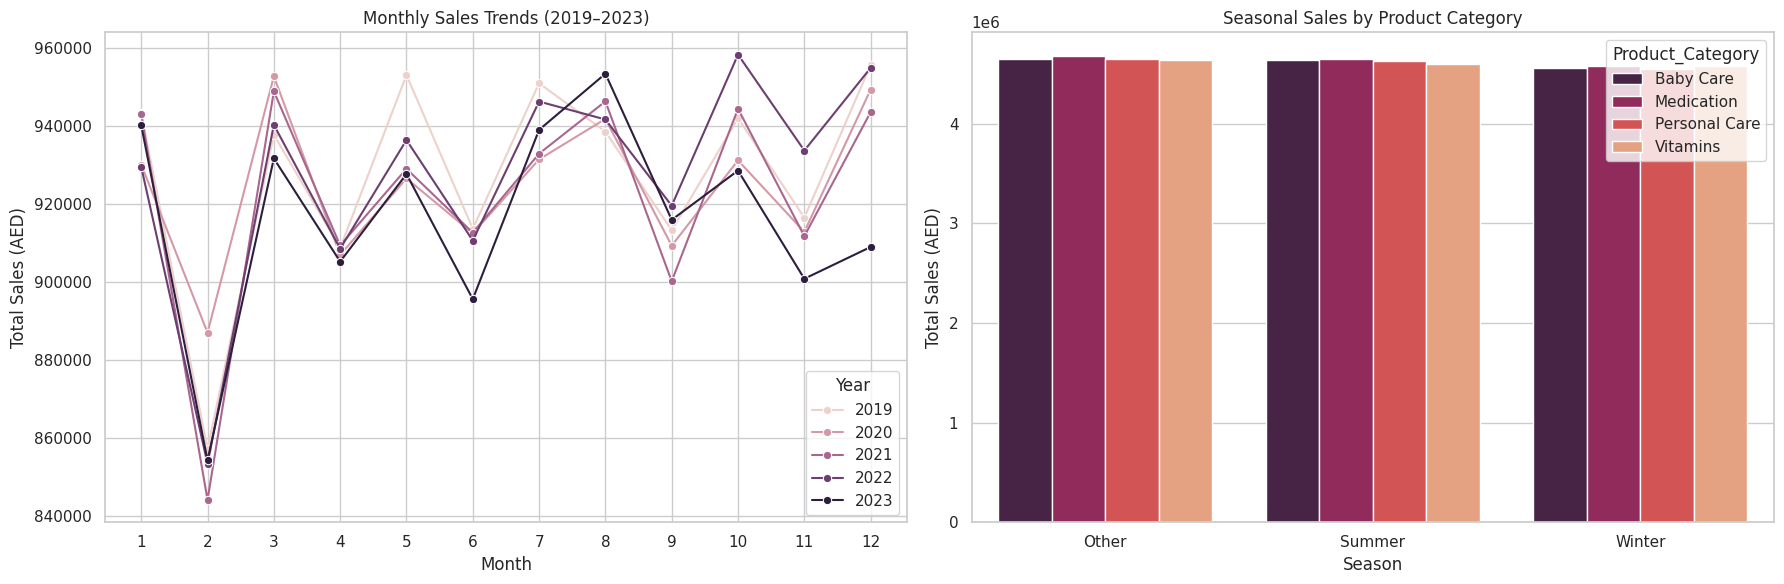

In [79]:
# Monthly Sales Trends and Seasonal Sales by Product Category
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(x='Month', y='Total_Price', hue='Year', data=monthly_sales, marker='o', ax=axes[0])
axes[0].set_title('Monthly Sales Trends (2019–2023)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Sales (AED)')
axes[0].set_xticks(range(1, 13))
axes[0].legend(title='Year')

sns.barplot(x='Season', y='Total_Price', hue='Product_Category', data=seasonal_category_sales, palette='rocket', ax=axes[1])
axes[1].set_title('Seasonal Sales by Product Category')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Total Sales (AED)')

plt.tight_layout()
plt.savefig('Sales Trends.png') # Save as PNG
plt.show()

In [80]:
# Monthly Sales Trends (Interactive Line Chart)
monthly_sales = df.groupby(['Year', 'Month'])['Total_Price'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

fig = px.line(
    monthly_sales,
    x='Date',
    y='Total_Price',
    title='Monthly Sales Trends (2019–2023)',
    labels={'Total_Price': 'Total Sales (AED)', 'Date': 'Month'},
    template='plotly_dark',  # Dark theme for a sleek look
    color_discrete_sequence=['#FFA07A']  # Custom color for the line
)
fig.update_traces(
    line_width=3,
    mode='lines+markers',  # Add markers for better visibility
    marker=dict(size=8, color='#FFD700')  # Gold markers for emphasis
)
fig.update_layout(
    font_family='Arial',
    font_size=12,
    title_font_size=20,
    title_x=0.5,
    xaxis_title='Month',
    yaxis_title='Total Sales (AED)',
    hovermode='x unified'  # Show hover data for all points on the x-axis
)
fig.show()

# Seasonal Sales by Product Category (Interactive Bar Chart)
seasonal_category_sales = df.groupby(['Season', 'Product_Category'])['Total_Price'].sum().reset_index()

fig = px.bar(
    seasonal_category_sales,
    x='Season',
    y='Total_Price',
    color='Product_Category',
    title='Seasonal Sales by Product Category',
    labels={'Total_Price': 'Total Sales (AED)', 'Season': 'Season', 'Product_Category': 'Product Category'},
    template='plotly_dark',  # Dark theme for a sleek look
    color_discrete_sequence=px.colors.qualitative.Pastel  # Soft pastel colors
)
fig.update_layout(
    font_family='Arial',
    font_size=12,
    title_font_size=20,
    title_x=0.5,
    xaxis_title='Season',
    yaxis_title='Total Sales (AED)',
    barmode='group'  # Grouped bars for better comparison
)
fig.show()

#### **4. Revenue Insights**


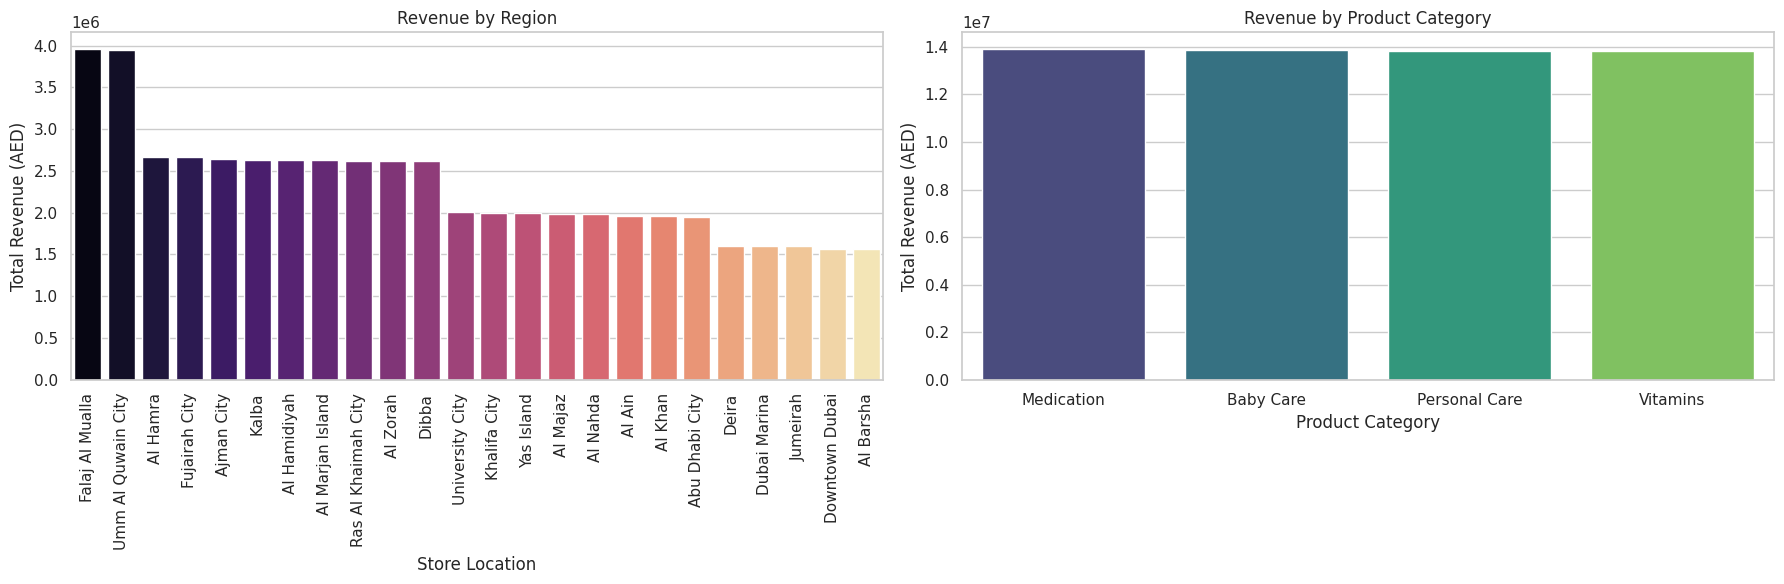

In [81]:
# Revenue by Region and Product Category
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Store_Location', y='Total_Price', data=region_revenue, palette='magma', ax=axes[0])
axes[0].set_title('Revenue by Region')
axes[0].set_xlabel('Store Location')
axes[0].set_ylabel('Total Revenue (AED)')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x='Product_Category', y='Total_Price', data=category_revenue, palette='viridis', ax=axes[1])
axes[1].set_title('Revenue by Product Category')
axes[1].set_xlabel('Product Category')
axes[1].set_ylabel('Total Revenue (AED)')

plt.tight_layout()
plt.savefig('Revenue Insights.png') # Save as PNG
plt.show()

### **Step 3: Prepare a Report**
We’ll organize the insights and visualizations into a structured report or presentation. Here’s an outline:

#### **Report Outline**:
1. **Introduction**:
   - Overview of the dataset and analysis objectives.
2. **Customer Behavior**:
   - Key insights and visualizations.
3. **Product Performance**:
   - Key insights and visualizations.
4. **Sales Trends**:
   - Key insights and visualizations.
5. **Revenue Insights**:
   - Key insights and visualizations.
6. **Conclusion and Recommendations**:
   - Summary of findings and actionable recommendations.


### **6. Act Phase**
#### **Objectives**:
1. **Define Recommendations**:
   - Provide actionable recommendations based on the insights.
2. **Prioritize Actions**:
   - Identify the most impactful actions for stakeholders.
3. **Plan Implementation**:
   - Suggest steps to implement the recommendations.

---

### **Step 1: Define Recommendations**
**key recommendations**:

#### **1. Customer Behavior**:
- **Target Insured Customers**:
  - Focus marketing efforts on insured customers, as they spend more overall and prefer high-margin products like **medications** and **vitamins**.
  - Offer loyalty programs or discounts to retain insured customers.

- **Engage Uninsured Customers**:
  - Develop campaigns to encourage uninsured customers to purchase **personal care** products, which are popular among this group.
  - Consider offering affordable insurance plans to increase customer loyalty.

#### **2. Product Performance**:
- **Optimize Inventory for Seasonal Trends**:
  - Stock more **cold medications** during **winter** and **sunscreen** and **allergy medications** during **summer**.
  - Run seasonal promotions to capitalize on these trends.

- **Promote Top-Selling Products**:
  - Highlight top-selling products like **Vitamin C 1000mg**, **Vitamin D 400IU** and **Multivitamin Tablets** in marketing campaigns.
  - Bundle these products with complementary items to increase sales.

#### **3. Sales Trends**:
- **Focus on High-Performing Regions**:
  - Allocate more resources to **Falaj Al Mualla** and **Umm Al Quwain City**, which generate the highest revenue.
  - Expand marketing efforts in these regions to maintain growth.

- **Improve Sales in Low-Performing Regions**:
  - Investigate the reasons for low sales in **Downtown Dubai** and **Al Barsha**.
  - Consider offering region-specific promotions or discounts to boost sales.

#### **4. Revenue Insights**:
- **Increase Credit Card Usage**:
  - Encourage customers to use **Credit Cards** by offering cashback or rewards for card payments.
  - Partner with banks to promote credit card usage in regions like **Umm Al Quwain City**, where **Cash** is more common.

- **Diversify Product Offerings**:
  - Introduce new products in high-revenue categories like **medications** and **vitamins**.
  - Explore partnerships with suppliers to offer exclusive products.

---

### **Step 2: Prioritize Actions**

1. **High Priority**:
   - Optimize inventory for seasonal trends.
   - Focus on high-performing regions (**Falaj Al Mualla** and **Umm Al Quwain City**).
   - Promote top-selling products.

2. **Medium Priority**:
   - Target insured customers with loyalty programs.
   - Increase credit card usage through partnerships and rewards.

3. **Low Priority**:
   - Engage uninsured customers with affordable insurance plans.
   - Improve sales in low-performing regions.

---

### **Step 3: Plan Implementation**

#### **Short-Term (0–3 Months)**:
- Launch seasonal promotions for **cold medications** and **sunscreen**.
- Run marketing campaigns for top-selling products.
- Partner with banks to promote credit card usage.

#### **Medium-Term (3–6 Months)**:
- Develop loyalty programs for insured customers.
- Introduce new products in high-revenue categories.
- Conduct market research to understand low-performing regions.

#### **Long-Term (6+ Months)**:
- Expand marketing efforts in high-performing regions.
- Offer affordable insurance plans to uninsured customers.
- Implement region-specific promotions in low-performing areas.


### Final Report

#### 1. Introduction

This report analyzes customer demographics, purchasing behavior, product performance, and revenue trends from 2019 to 2023. The objective is to provide actionable insights to optimize business strategies, improve customer engagement, and drive revenue growth.  The data encompasses sales transactions, customer demographics, and product information.

#### 2. Key Insights

* **Customer Demographics:** The majority of customers are aged 30-40, with a slight male majority. A significant portion of customers hold insurance, and these insured customers exhibit higher overall spending habits.  Insured customers primarily purchase medications and vitamins, while uninsured customers focus on baby care products.
* **Product Performance:** Medications and vitamins are the top-performing product categories. The best-selling products include Vitamin C 1000mg, Vitamin D 400IU, and Multivitamin Tablets.  Seasonal trends influence sales, with cold medications peaking in winter and sunscreen/allergy medications in summer.
* **Sales Trends:** Geographically, Falaj Al Mualla and Umm Al Quwain City demonstrate the highest sales figures, while Downtown Dubai and Al Barsha show the lowest. Cash is the preferred payment method, followed by credit card. Payment method preferences vary by region, with debit card usage higher in Falaj Al Mualla and cash more prevalent in Umm Al Quwain City.
* **Revenue Insights:** Total revenue from 2019 to 2023 reached AED 55,421,164.83. Falaj Al Mualla and Umm Al Quwain City are the primary revenue drivers. Medications and vitamins are the top revenue-generating categories.

#### 3. Recommendations

* **Targeted Marketing:** Develop targeted marketing campaigns based on customer demographics and purchasing behavior. For example, promote baby care products to uninsured customers and medications/vitamins to insured customers through tailored advertising and loyalty programs.  Focus marketing efforts in Falaj Al Mualla and Umm Al Quwain City, while exploring strategies to increase sales in Downtown Dubai and Al Barsha.
* **Product Optimization:** Optimize product inventory based on seasonal trends and regional preferences. Ensure sufficient stock of cold medications during winter and sunscreen/allergy medications during summer.  Consider promotional offers or bundles for top-selling products like Vitamin C, Vitamin D, and Multivitamin Tablets.  Explore expanding the baby care product line to cater to the uninsured customer segment.
* **Payment Strategy:** While cash remains dominant, particularly in Umm Al Quwain City, explore strategies to encourage credit card and debit card usage, especially in regions like Falaj Al Mualla.  This could include loyalty programs, discounts for cashless transactions, or improved POS infrastructure.
* **Regional Focus:** Conduct further market research in Downtown Dubai and Al Barsha to understand the lower sales performance.  Tailor product offerings, marketing campaigns, and potentially explore partnerships to increase market penetration in these areas.  Consider localized promotions and events.
* **Customer Segmentation:** Implement a customer segmentation strategy based on insurance status, age, product preferences, and location. This allows for personalized marketing, targeted promotions, and improved customer relationship management.


#### 4. Implementation Plan

* **Phase 1 (1-2 months):** Conduct market research in underperforming regions. Develop targeted marketing campaigns and customer segmentation strategy.  Begin A/B testing promotions for key product categories.
* **Phase 2 (3-6 months):** Implement changes to product inventory and payment infrastructure. Launch targeted marketing campaigns.  Roll out loyalty programs and personalized offers.
* **Phase 3 (Ongoing):** Monitor performance metrics and refine strategies based on data. Continuously analyze customer behavior and market trends.  Gather customer feedback and iterate on implemented initiatives.

#### 5. Conclusion

By implementing these recommendations, the business can capitalize on existing strengths, address areas of weakness, and drive significant improvements in customer engagement, sales, and revenue.  Targeted marketing, product optimization, and a customer-centric approach will contribute to sustainable growth and enhance the company's competitive position.  Regular monitoring and analysis of performance metrics are crucial for continuous improvement and maximizing the impact of these recommendations.  The potential impact includes increased market share, improved customer loyalty, and optimized revenue generation.


In [100]:
from IPython.display import HTML
import base64

# Function to encode images to base64
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_string

# Encode your images
customer_behavior_img = encode_image('/content/Customer Behavior.png')
product_performance_img = encode_image('/content/Product Performance.png')
revenue_insights_img = encode_image('/content/Revenue Insights.png')
sales_trends_img = encode_image('/content/Sales Trends.png')

html_report = f"""
<!DOCTYPE html>
<html>
<head>
<title>Data Analysis Report</title>
<style>
body {{
    font-family: Arial, sans-serif;
    line-height: 1.6;
    margin: 20px;
    background-color: #f4f4f4;
    color: #333;
}}

h1, h2, h3, h4 {{
    color: #0056b3;
}}

h1 {{
  font-size: 2.5em;
}}

h2 {{
  font-size: 2em;
}}

.section {{
    background-color: #fff;
    padding: 20px;
    margin-bottom: 20px;
    border-radius: 8px;
    box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
}}

img {{
    max-width: 100%;
    height: auto;
    display: block;
    margin: 0 auto;
}}

.signature {{
    text-align: right;
    margin-top: 40px;
    font-style: italic;
}}

.recommendation {{
    background-color: #e6f2ff;
    padding: 10px;
    border-radius: 4px;
    margin-bottom: 10px;
}}
</style>
</head>
<body>

<h1>Data Analysis Report</h1>

<div class="section">
    <h2>Introduction</h2>
    <p>This report analyzes customer demographics, purchasing behavior, product performance, and revenue trends from 2019 to 2023. The objective is to provide actionable insights to optimize business strategies, improve customer engagement, and drive revenue growth.  The data encompasses sales transactions, customer demographics, and product information.</p>
</div>

<div class="section">
    <h2>Key Insights</h2>
    <img src='data:image/png;base64,{customer_behavior_img}' alt="Customer Distribution">
    <p><b>Customer Demographics:</b> The majority of customers are aged 30-40, with a slight male majority. A significant portion of customers hold insurance, and these insured customers exhibit higher overall spending habits. Insured customers primarily purchase medications and vitamins, while uninsured customers focus on baby care products.</p>
    <img src='data:image/png;base64,{product_performance_img}' alt="Product Performance">
    <p><b>Product Performance:</b> Medications and vitamins are the top-performing product categories. The best-selling products include Vitamin C 1000mg, Vitamin D 400IU, and Multivitamin Tablets. Seasonal trends influence sales, with cold medications peaking in winter and sunscreen/allergy medications in summer.</p>
    <img src='data:image/png;base64,{sales_trends_img}' alt="Sales Trends">
    <p><b>Sales Trends:</b> Geographically, Falaj Al Mualla and Umm Al Quwain City demonstrate the highest sales figures, while Downtown Dubai and Al Barsha show the lowest. Cash is the preferred payment method, followed by credit card. Payment method preferences vary by region, with debit card usage higher in Falaj Al Mualla and cash more prevalent in Umm Al Quwain City.</p>
    <img src='data:image/png;base64,{revenue_insights_img}' alt="Revenue Insights">
    <p><b>Revenue Insights:</b> Total revenue from 2019 to 2023 reached AED 55,421,164.83. Falaj Al Mualla and Umm Al Quwain City are the primary revenue drivers. Medications and vitamins are the top revenue-generating categories.</p>



<div class="section">
    <h2>Recommendations</h2>
    <p><b>Targeted Marketing:</b> Develop targeted marketing campaigns based on customer demographics and purchasing behavior. For example, promote baby care products to uninsured customers and medications/vitamins to insured customers through tailored advertising and loyalty programs. Focus marketing efforts in Falaj Al Mualla and Umm Al Quwain City, while exploring strategies to increase sales in Downtown Dubai and Al Barsha.</p>
    <p><b>Product Optimization:</b> Optimize product inventory based on seasonal trends and regional preferences. Ensure sufficient stock of cold medications during winter and sunscreen/allergy medications during summer. Consider promotional offers or bundles for top-selling products like Vitamin C, Vitamin D, and Multivitamin Tablets. Explore expanding the baby care product line to cater to the uninsured customer segment.</p>
    <p><b>Payment Strategy:</b> While cash remains dominant, particularly in Umm Al Quwain City, explore strategies to encourage credit card and debit card usage, especially in regions like Falaj Al Mualla. This could include loyalty programs, discounts for cashless transactions, or improved POS infrastructure.</p>
    <p><b>Regional Focus:</b> Conduct further market research in Downtown Dubai and Al Barsha to understand the lower sales performance. Tailor product offerings, marketing campaigns, and potentially explore partnerships to increase market penetration in these areas. Consider localized promotions and events.</p>
    <p><b>Customer Segmentation:</b> Implement a customer segmentation strategy based on insurance status, age, product preferences, and location. This allows for personalized marketing, targeted promotions, and improved customer relationship management.</p>
</div>

<div class="section">
    <h2>Implementation Plan</h2>
    <p><b>Phase 1 (1-2 months):</b> Conduct market research in underperforming regions. Develop targeted marketing campaigns and customer segmentation strategy. Begin A/B testing promotions for key product categories.</p>
    <p><b>Phase 2 (3-6 months):</b> Implement changes to product inventory and payment infrastructure. Launch targeted marketing campaigns. Roll out loyalty programs and personalized offers.</p>
    <p><b>Phase 3 (Ongoing):</b> Monitor performance metrics and refine strategies based on data. Continuously analyze customer behavior and market trends. Gather customer feedback and iterate on implemented initiatives.</p>
</div>

<div class="section">
    <h2>Conclusion</h2>
    <p>By implementing these recommendations, the business can capitalize on existing strengths, address areas of weakness, and drive significant improvements in customer engagement, sales, and revenue. Targeted marketing, product optimization, and a customer-centric approach will contribute to sustainable growth and enhance the company's competitive position. Regular monitoring and analysis of performance metrics are crucial for continuous improvement and maximizing the impact of these recommendations. The potential impact includes increased market share, improved customer loyalty, and optimized revenue generation.</p>
</div>

<div class="signature">
    WALID BARGHOUT

</div>


</body>
</html>
"""

HTML(html_report)

# Export to HTML file
with open('data_analysis_report.html', 'w') as f:
    f.write(html_report)

print("Report exported successfully to data_analysis_report.html")

Report exported successfully to data_analysis_report.html
